In [8]:
import tensorflow as tf
tf.test.gpu_device_name()
#dont forget to set GPU
#correct output should be: /device:GPU:0

'/device:GPU:0'

In [6]:
# Location of Zip File
image_path = 'Semester_04\Data Science\L7\flowers.zip'
local_path = 'Semester_04\Data Science\L7\Content'

# Copy the zip file and move it up one level (AKA out of the drive folder)
!cp '{image_path}'

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import zipfile

def unzip_quietly(filename):
  """
  Extracts the contents of a zip file quietly (without printing messages).

  Args:
      filename (str): The path to the zip file to extract.
  """
  with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(path=None)  # Extract to current working directory

# Example usage:
unzip_quietly('flowers.zip')


In [7]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

def read_and_decode(filename, reshape_dims):
  # Read the file
  img = tf.io.read_file(filename)
  # Convert the compressed string to a 3D uint8 tensor.
  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)

  # img = tf.image.decode_image(img, channels=IMG_CHANNELS, expand_animations=False)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # img = tf.resize_images_v2(img, reshape_dims, method="bilinear")
  # return img.set_shape((image_size[0], image_size[1], num_channels))

  # Resize the image to the desired size.
  img = tf.image.resize(img, reshape_dims) #[244,244] using image module for resizing,
  #must also apply on testing and validation dataset
  return img

  ##add prediction and preprocessing

#change regex pattern from PetImages\\ to PetImages/
pattern = r'train/'
print(tf.io.gfile.glob("train/*"))
CLASS_NAMES = [item.numpy().decode("utf-8") for item in
               tf.strings.regex_replace(
                 tf.io.gfile.glob("train/*"),
                 pattern, "")]

print(CLASS_NAMES)
CLASS_NAMES = [item for item in CLASS_NAMES if item.find(".") == -1]
print("These are the available classes:", CLASS_NAMES)

['train\\daisy', 'train\\dandelion', 'train\\rose', 'train\\sunflower', 'train\\tulip']
['train\\daisy', 'train\\dandelion', 'train\\rose', 'train\\sunflower', 'train\\tulip']
These are the available classes: ['train\\daisy', 'train\\dandelion', 'train\\rose', 'train\\sunflower', 'train\\tulip']


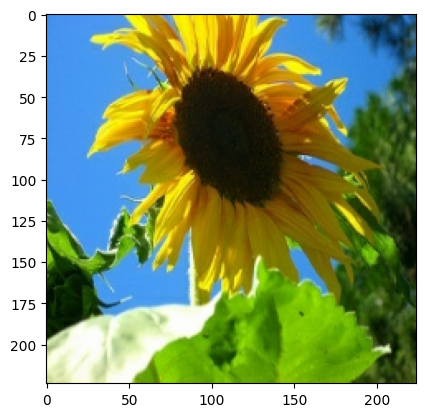

In [9]:
def show_image(filename):
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  plt.imshow((img.numpy()));

show_image(
    "test/Image_1.jpg")

['train\\daisy\\10140303196_b88d3d6cec.jpg', 'train\\daisy\\10172379554_b296050f82_n.jpg', 'train\\daisy\\10172567486_2748826a8b.jpg', 'train\\daisy\\10172636503_21bededa75_n.jpg', 'train\\daisy\\10391248763_1d16681106_n.jpg', 'train\\daisy\\10437754174_22ec990b77_m.jpg', 'train\\daisy\\10437770546_8bb6f7bdd3_m.jpg', 'train\\daisy\\10437929963_bc13eebe0c.jpg', 'train\\daisy\\10466290366_cc72e33532.jpg', 'train\\daisy\\10466558316_a7198b87e2.jpg', 'train\\daisy\\10555749515_13a12a026e.jpg', 'train\\daisy\\10555815624_dc211569b0.jpg', 'train\\daisy\\10555826524_423eb8bf71_n.jpg', 'train\\daisy\\10559679065_50d2b16f6d.jpg', 'train\\daisy\\10712722853_5632165b04.jpg', 'train\\daisy\\10770585085_4742b9dac3_n.jpg', 'train\\daisy\\10841136265_af473efc60.jpg', 'train\\daisy\\10993710036_2033222c91.jpg', 'train\\daisy\\10993818044_4c19b86c82.jpg', 'train\\daisy\\10994032453_ac7f8d9e2e.jpg', 'train\\daisy\\11023214096_b5b39fab08.jpg', 'train\\daisy\\11023272144_fce94401f2_m.jpg', 'train\\daisy\\

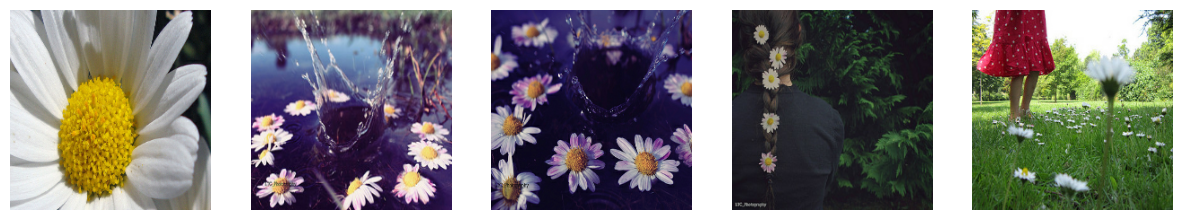

In [10]:
flowers = tf.io.gfile.glob("train/daisy/*.jpg")
f, ax = plt.subplots(1, 5, figsize=(15,15))
print(flowers)
for idx, filename in enumerate(flowers[:5]):
  print(filename)
  print(idx)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  ax[idx].imshow((img.numpy()));
  ax[idx].axis('off')

In [18]:
import pandas as pd
import os

flowersdf = pd.DataFrame(columns=['path', 'class'])
absolutePath = r"train/"

# Get a list of class subdirectories within the absolute path
class_dirs = [d for d in os.listdir(absolutePath) if os.path.isdir(os.path.join(absolutePath, d))]

for class_dir in class_dirs:
  class_path = os.path.join(absolutePath, class_dir)

  # Find image files within the class directory using a glob pattern
  image_paths = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg'))]

  paths_df = pd.DataFrame({'path': image_paths})
  paths_df['class'] = class_dir

  flowersdf = pd.concat([flowersdf, paths_df], ignore_index=True)

print(flowersdf)


                                          path  class
0       train/daisy\10140303196_b88d3d6cec.jpg  daisy
1     train/daisy\10172379554_b296050f82_n.jpg  daisy
2       train/daisy\10172567486_2748826a8b.jpg  daisy
3     train/daisy\10172636503_21bededa75_n.jpg  daisy
4     train/daisy\10391248763_1d16681106_n.jpg  daisy
...                                        ...    ...
2741   train/tulip\9831362123_5aac525a99_n.jpg  tulip
2742   train/tulip\9870557734_88eb3b9e3b_n.jpg  tulip
2743   train/tulip\9947374414_fdf1d0861c_n.jpg  tulip
2744   train/tulip\9947385346_3a8cacea02_n.jpg  tulip
2745     train/tulip\9976515506_d496c5e72c.jpg  tulip

[2746 rows x 2 columns]


In [19]:
#create train set and test set
#use train folder data only as test set was not labelled

# Split data into training and testing sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(flowersdf["path"], flowersdf["class"], test_size=0.20)

# Create DataFrames from the split data
X_train_df = pd.DataFrame(X_train, columns=["path"])
X_test_df = pd.DataFrame(X_test, columns=["path"])

# Concatenate paths and labels for training and testing data
trainData = pd.concat([X_train_df, y_train], axis=1)
testData = pd.concat([X_test_df, y_test], axis=1)

trainData.to_csv("train.csv",index=False, header=False)
testData.to_csv("test.csv",index=False, header=False)
print(trainData)


                                            path      class
1291       train/rose\17158274118_00ec99a23c.jpg       rose
41      train/daisy\14073784469_ffb12f3387_n.jpg      daisy
297      train/daisy\4561871220_47f420ca59_m.jpg      daisy
2507     train/tulip\5529939805_1679b014e1_n.jpg      tulip
2293      train/tulip\14116780333_7836f4448c.jpg      tulip
...                                          ...        ...
137     train/daisy\20580471306_ab5a011b15_n.jpg      daisy
2672     train/tulip\8687675254_c93f50d8b0_m.jpg      tulip
2142    train/tulip\10163955604_ae0b830975_n.jpg      tulip
1116   train/dandelion\8980266062_8387f6cc89.jpg  dandelion
511   train/dandelion\10779476016_9130714dc0.jpg  dandelion

[2196 rows x 2 columns]


In [21]:
def decode_csv(csv_row):
  record_defaults = ["path", "flower"]
  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))
  return img, label

In [22]:
train_dataset = (tf.data.TextLineDataset(
    "train.csv").
    map(decode_csv)).batch(10)

eval_dataset = (tf.data.TextLineDataset(
    "test.csv").
    map(decode_csv)).batch(10)

print(train_dataset)
print(eval_dataset)


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [23]:
# linear model
model = tf.keras.Sequential([
              tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
              tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 5)                 752645    
                                                                 
Total params: 752,645
Trainable params: 752,645
Non-trainable params: 0
_________________________________________________________________


In [25]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [26]:
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=1)

220/220 [==============================] - 5s 16ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [29]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(15,5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric])
        ax[idx].set_xlabel("Epochs")
        # ax[idx].set_ylabel(metric, fontweight='bold', fontsize=20)
        ax[idx].plot(history.history['val_' + metric], ls='dashed');
        ax[idx].legend([metric, 'val_' + metric], fontsize=20)

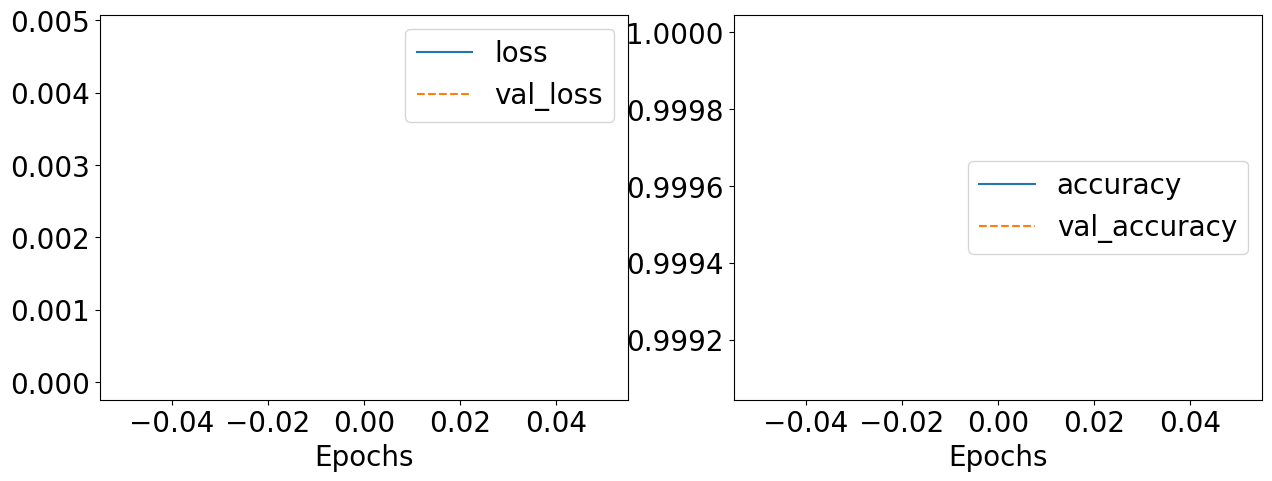

In [30]:
training_plot(['loss', 'accuracy'], history);

[0.09405971 0.0570501  0.8488902 ]
[0.04838872 0.0721875  0.8794238 ]


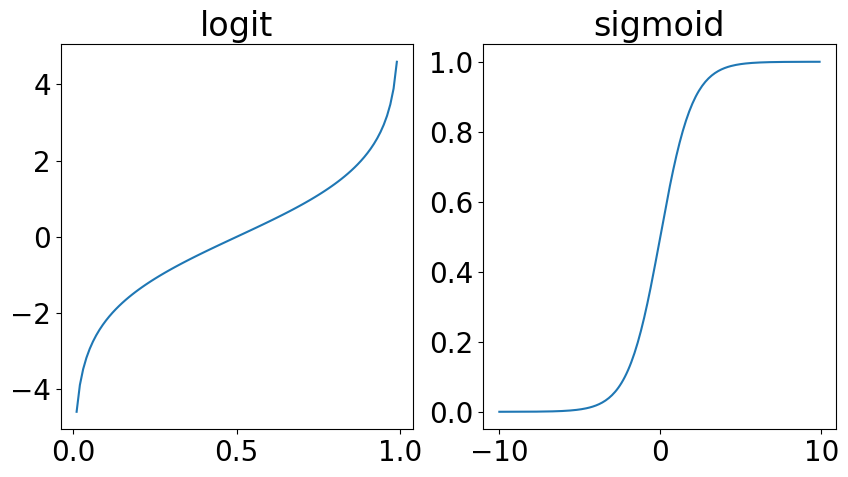

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

fig, ax = plt.subplots(1, 2, figsize=(10,5))
x = np.arange(0.01, 1.0, 0.01)
y = np.log(x / (1-x))
ax[0].plot(x, y)
ax[0].set_title("logit")
x = np.arange(-10.0, 10.0, 0.1)
y = tf.math.sigmoid(x)
ax[1].plot(x, y);
ax[1].set_title("sigmoid")

print( tf.math.softmax([-1.0, -1.5, 1.2]).numpy() )
print( tf.math.softmax([0.1, 0.5, 3.0]).numpy() )

1/1 [==============================] - 0s 22ms/step


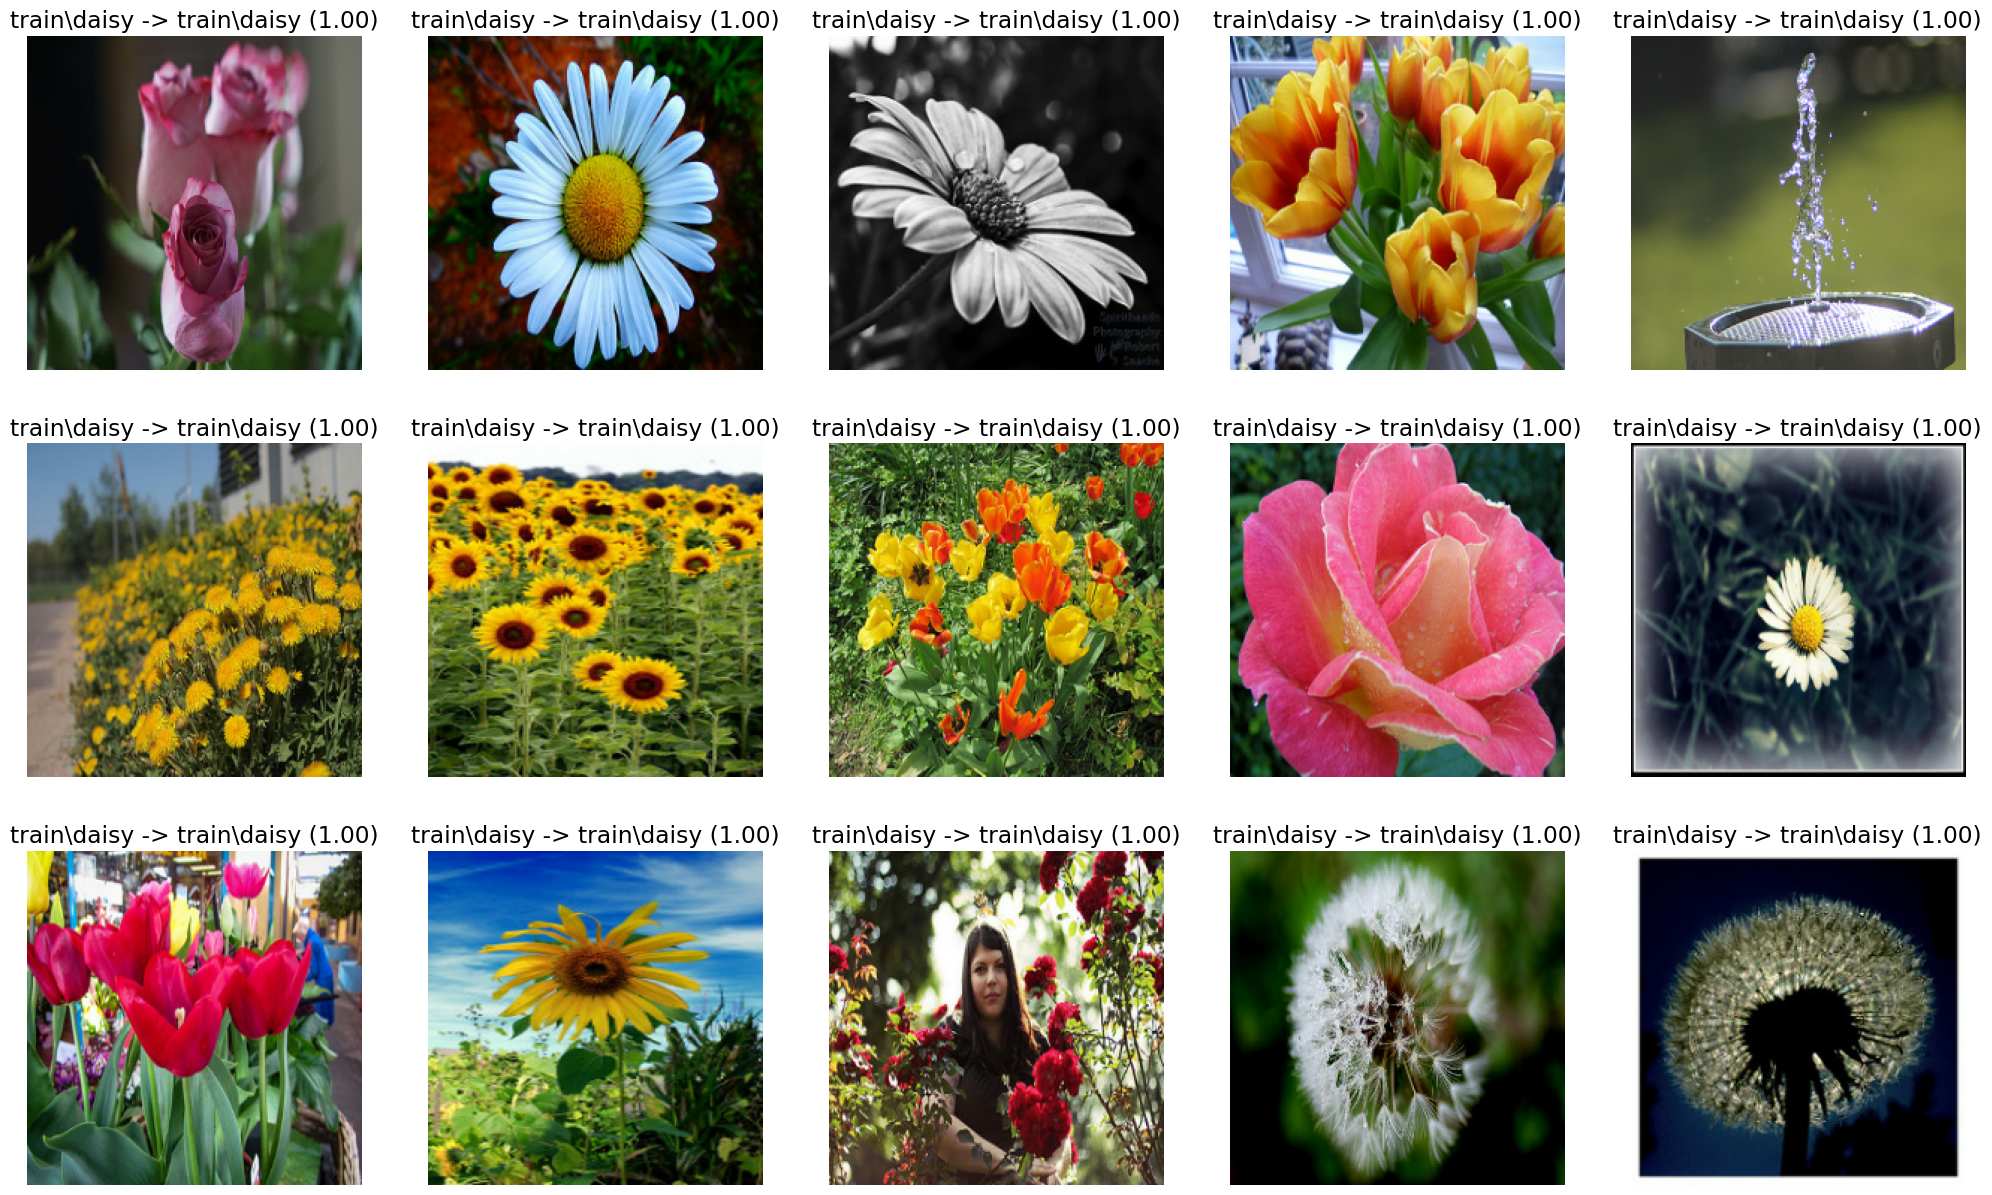

In [32]:
# Call model.predict() on a few images in the evaluation dataset
def plot_predictions(filename):
  matplotlib.rcParams.update({'font.size': 14})
  f, ax = plt.subplots(3, 5, figsize=(25,15))
  dataset = (tf.data.TextLineDataset(filename).
      map(decode_csv))
  for idx, (img, label) in enumerate(dataset.take(15)):
    ax[idx//5, idx%5].imshow((img.numpy()));
    batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])
    batch_pred = model.predict(batch_image)
    pred = batch_pred[0]
    label = CLASS_NAMES[label.numpy()]
    pred_label_index = tf.math.argmax(pred).numpy()
    pred_label = CLASS_NAMES[pred_label_index]
    prob = pred[pred_label_index]
    ax[idx//5, idx%5].set_title('{} -> {} ({:.2f})'.format(label, pred_label, prob))
    ax[idx//5, idx%5].axis('off')

plot_predictions("train.csv")

1/1 [==============================] - 0s 21ms/step


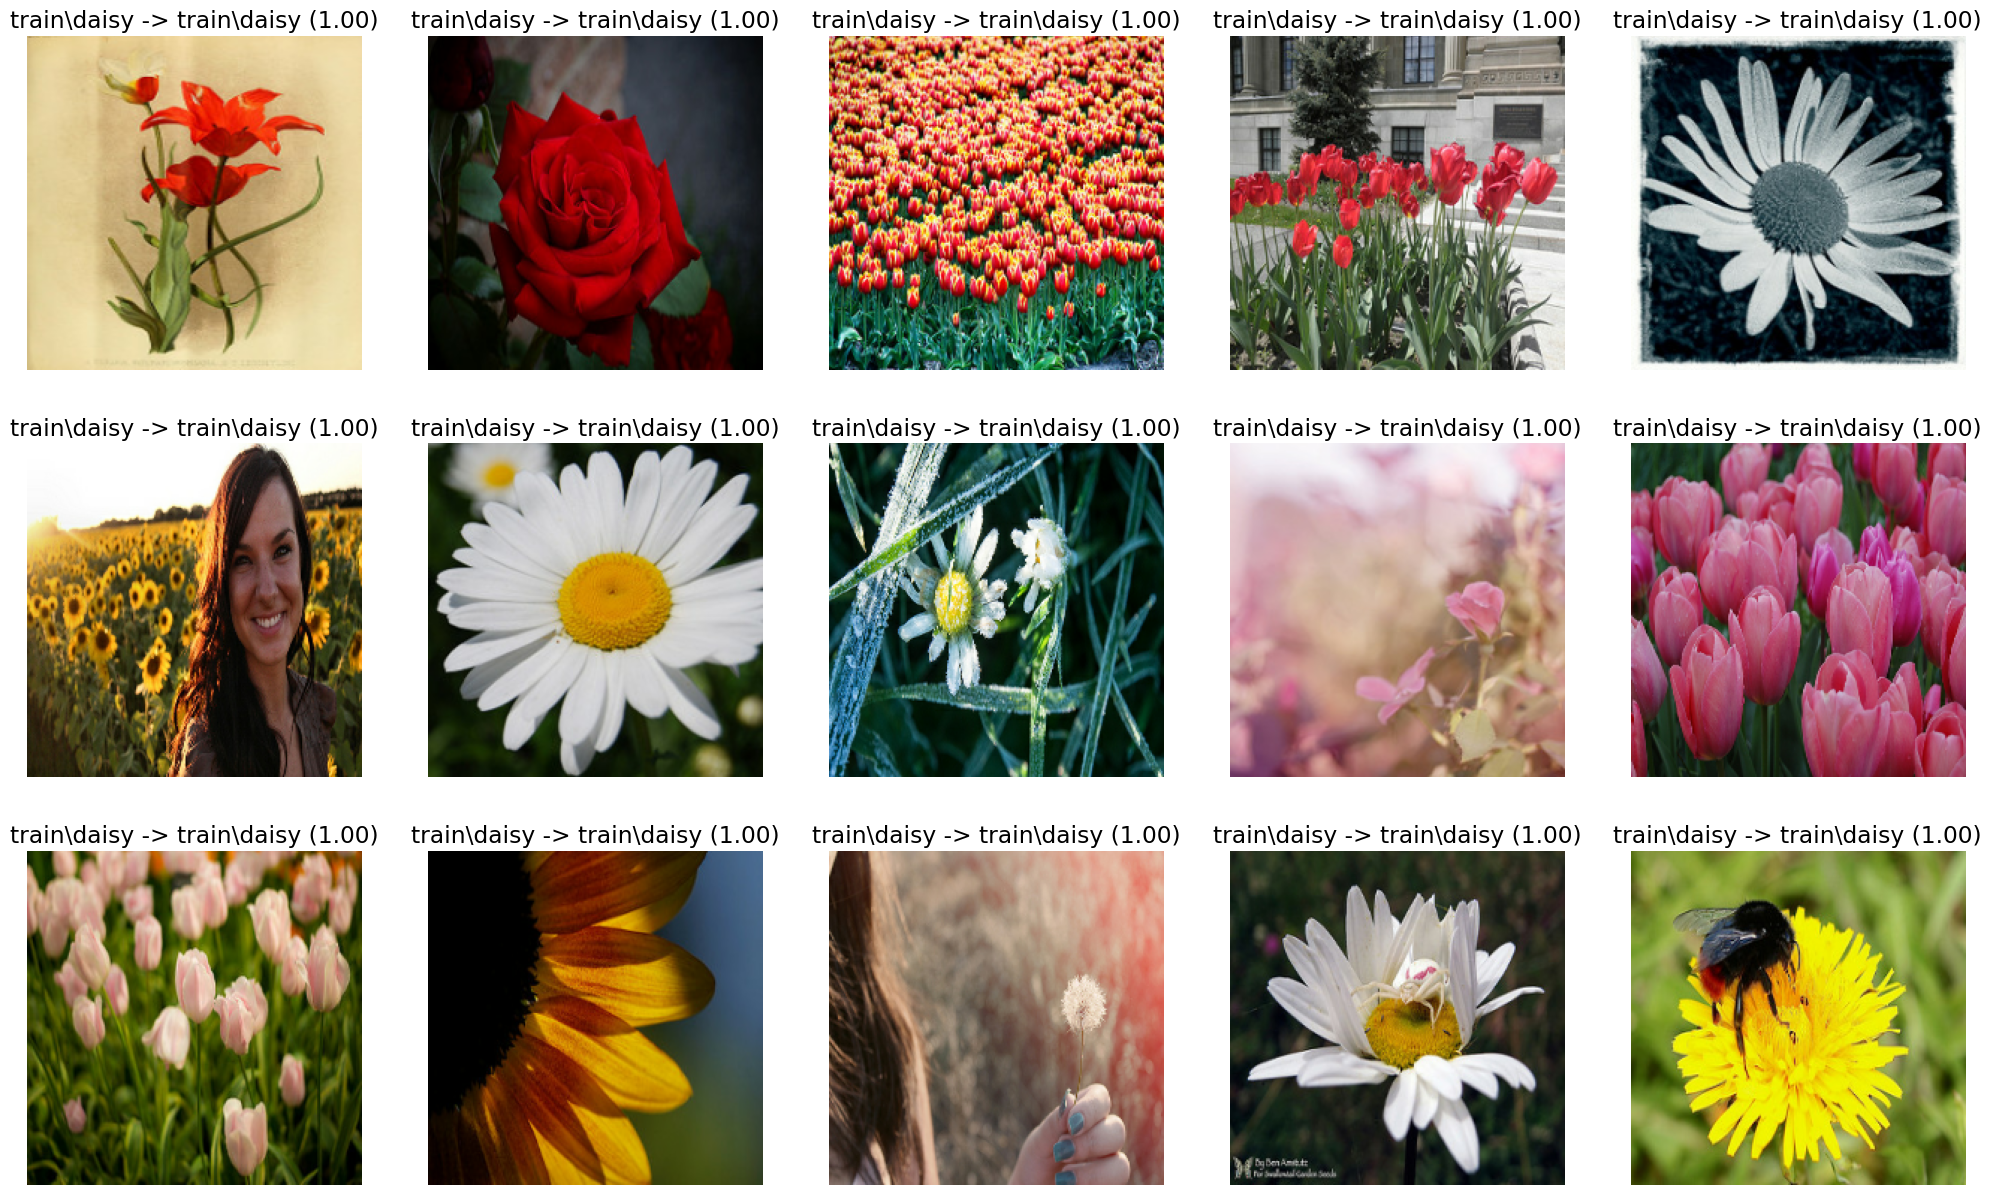

In [33]:
plot_predictions("test.csv")

Scaling weights for train\daisy in -0.00030781130772084 to 0.012318741530179977
Scaling weights for train\dandelion in -0.012318547815084457 to 0.0003082590701524168
Scaling weights for train\rose in -0.012318354099988937 to 0.0003083465271629393
Scaling weights for train\sunflower in -0.012318623252213001 to 0.0003082500188611448
Scaling weights for train\tulip in -0.012318491004407406 to 0.0003080681199207902


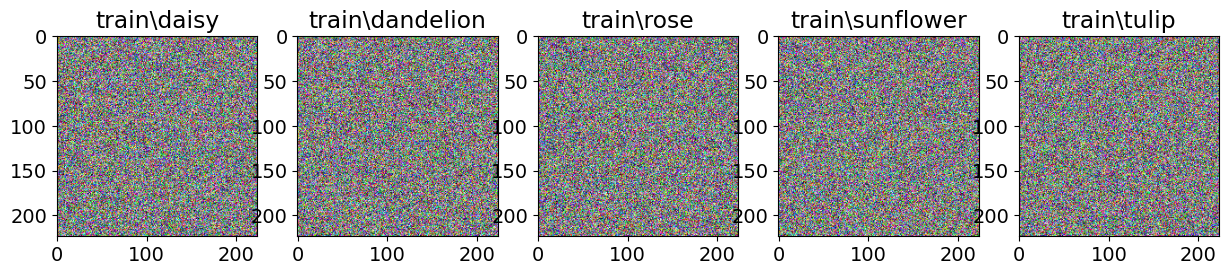

In [34]:
def show_trained_weights(model):
  # CLASS_NAMES is ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
  LAYER = 1 # Layer 0 flattens the image, layer=1 is the first dense layer
  WEIGHT_TYPE = 0 # 0 for weight, 1 for bias

  f, ax = plt.subplots(1, 5, figsize=(15,15))
  for flower in range(len(CLASS_NAMES)):
    weights = model.layers[LAYER].get_weights()[WEIGHT_TYPE][:, flower]
    min_wt = tf.math.reduce_min(weights).numpy()
    max_wt = tf.math.reduce_max(weights).numpy()
    flower_name = CLASS_NAMES[flower]
    print("Scaling weights for {} in {} to {}".format(
        flower_name, min_wt, max_wt))
    weights = (weights - min_wt)/(max_wt - min_wt)
    ax[flower].imshow(weights.reshape(IMG_HEIGHT, IMG_WIDTH, 3));
    ax[flower].set_title(flower_name);

show_trained_weights(model)

[0.   0.09 0.06 0.85 0.  ] [0.         0.01696592 0.01094963 0.9720845  0.        ]
[0.09090909 0.09090909 0.6363636  0.09090909 0.09090909] [0.04651164 0.04651164 0.8139535  0.04651164 0.04651164]
[0.   0.25 0.5  0.25 0.  ] [0.        0.2       0.6000001 0.2       0.       ]
[0.08333333 0.08333333 0.3333333  0.41666666 0.08333333] [0.06113537 0.06113537 0.33624452 0.48034936 0.06113537]
[0.125 0.125 0.5   0.125 0.125] [0.09090909 0.09090909 0.6363636  0.09090909 0.09090909]


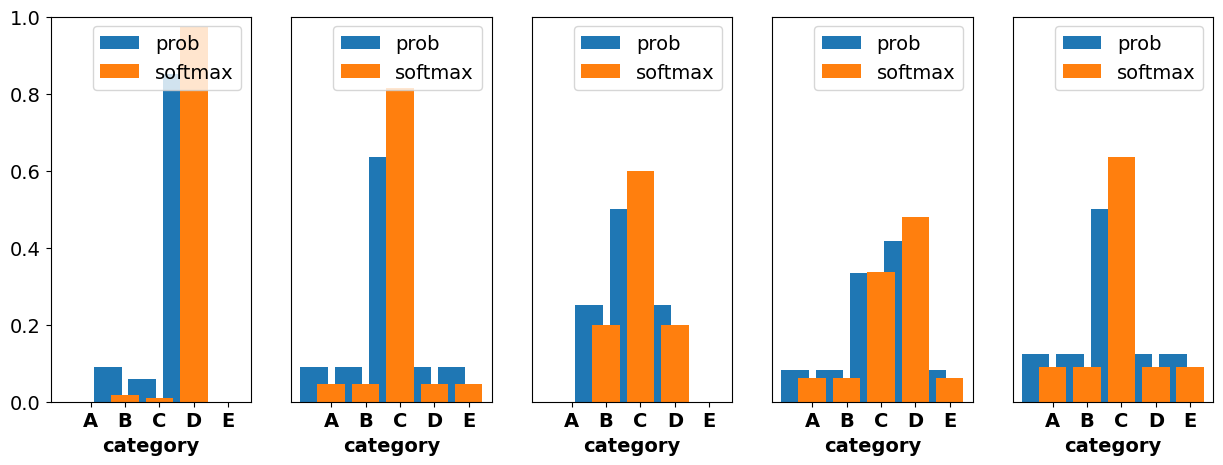

In [36]:
import tensorflow as tf

inx = [
    [0, 0.09, 0.06, 0.85, 0],
    [0.1, 0.1, 0.7, 0.1, 0.1],
    [0, 0.2, 0.4, 0.2, 0],
    [0.1, 0.1, 0.4, 0.5, 0.1],
    [0.2, 0.2, 0.8, 0.2, 0.2],
]

def logit(x):
    return - tf.math.log(1. / x - 1.)

barWidth = 0.5
r1 = np.arange(len(inx[0]))
r2 = [x + barWidth for x in r1]

f, ax = plt.subplots(1, 5, figsize=(15,5))
for idx, x in enumerate(inx):
    prob = x / tf.reduce_sum(x)
    softmax = tf.nn.softmax(logit(prob))
    print(prob.numpy(), softmax.numpy())
    ax[idx].bar(r1, prob, label='prob')
    ax[idx].bar(r2, softmax, label='softmax')
    ax[idx].set_xlabel('category', fontweight='bold')
    ax[idx].set_xticks(r2)
    ax[idx].set_xticklabels(['A','B','C','D','E'], fontweight='bold')
    ax[idx].set_ylim([0,1])
    if idx > 0:
        ax[idx].yaxis.set_visible(False)
    ax[idx].legend()